# Drills in Classification
Without practice, you cannot claim that you know things and these drills here are there to enable this option for you. Are you ready to classify some very interesting data? 


## Exercise 1
* **Dataset:** `Iris`
* **Model to use:** [`KNN`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* **Model evaluation:** try the [classification report](http://www.thedatalife.com/classification-report-python/)

The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. 

You can load the dataset with `scikit-learn` by using: 

```python
sklearn.datasets.load_iris()
```

Your mission it to apply KNN to this dataset and find the best K.

You will quickly understand that you can't evaluate a complexe classification model just with a percentage of accuracy. 

To understand how accurate your model is and, more importantly, where it is wrong, use scikit learn's [classification report](http://www.thedatalife.com/classification-report-python/).

To use it properly, you will need to understand what the following terms are:
* `Recall`
* `Precision`
* `F1-score`
* `Support`

You can make your own research or [read this article](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/).

In [6]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
%matplotlib inline

In [29]:
#extra imports from https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [30]:
# Load you dataset
iris=load_iris(as_frame=True)


In [31]:
# Explore the dataset to understand it. (use pandas and your data visualation's favorite library)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [32]:
X = iris.data
y = iris.target

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
for col in X:
    print(col)
    print(type(col))
    print(f'NaN values: {X[col].isnull().sum()}')
    print(f'number of unique values: {X[col].nunique()}')
    print(f'unique values: {X[col].unique()}')
    print('==========')

sepal length (cm)
<class 'str'>
NaN values: 0
number of unique values: 35
unique values: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
sepal width (cm)
<class 'str'>
NaN values: 0
number of unique values: 23
unique values: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
petal length (cm)
<class 'str'>
NaN values: 0
number of unique values: 43
unique values: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
petal width (cm)
<class 'str'>
NaN values: 0
number of unique values: 22
unique values: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]


y=target is one of the 3 iris flowers

In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

/home/regis/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


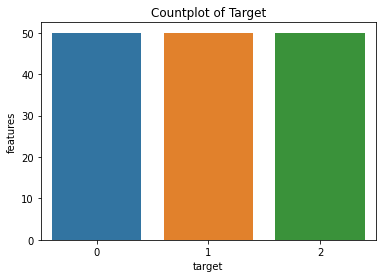

In [36]:
#2. distribution of target variable.
sns.countplot(iris['target'])

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('features')
plt.show()

In [37]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [38]:
# Preprocess the data (deal with NaNs, deal with text features,...)
for col in X:
    X[col] = X[col].astype(float)

/home/regis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems

Let us proceed by splitting our training and test data and our input and target variables. Since we are using KNN, it is mandatory to scale our datasets too

In [41]:
# Use a KNN model
#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [43]:
X_train.shape

(105, 4)

The intuition behind choosing the best value of k is beyond the scope of this article, but we should know that we can determine the optimum value of k when we get the highest test score for that value. For that, we can evaluate the training and testing scores for up to 20 nearest neighbors:

In [44]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To evaluate the max test score and the k values associated with it, run the following command:

In [45]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 97.77777777777777 and k = [1, 2, 11, 13, 14, 16]


Thus, we have obtained the optimum value of k to be [1, 2, 11, 13, 14, 16] with a score of 97.77777777777777. We will finalize one of these values and fit the model accordingly:

In [51]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train, y_train)
# Evaluate your model
knn.score(X_test, y_test)

0.9777777777777777

Now, how do we evaluate whether this model is a ‘good’ model or not? For that, we use something called a Confusion Matrix:

In [52]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,All
Actual,,,,
0,14,0,0,14
1,0,13,0,13
2,0,1,17,18
All,14,14,17,45


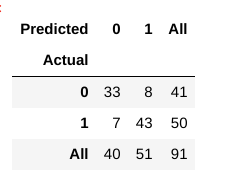
Precision and Recall - Confusion Matrix
A confusion matrix helps us gain an insight into how correct our predictions were and how they hold up against the actual values.

From our train and test data, we already know that our test data consisted of 91 data points. That is the 3rd row and 3rd column value at the end. We also notice that there are some actual and predicted values. The actual values are the number of data points that were originally categorized into 0 or 1. The predicted values are the number of data points our KNN model predicted as 0 or 1.

The actual values are:

The patients who actually don’t have a heart disease = 41
The patients who actually do have a heart disease = 50
The predicted values are:

Number of patients who were predicted as not having a heart disease = 40
Number of patients who were predicted as having a heart disease = 51
All the values we obtain above have a term. Let’s go over them one by one:

The cases in which the patients actually did not have heart disease and our model also predicted as not having it is called the True Negatives. For our matrix, True Negatives = 33.
The cases in which the patients actually have heart disease and our model also predicted as having it are called the True Positives. For our matrix, True Positives = 43
However, there are are some cases where the patient actually has no heart disease, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, False Positives = 8
 Similarly, there are are some cases where the patient actually has heart disease, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, False Negatives = 7



## scikit learn's classification report
Classification report is used to evaluate a model’s predictive power. It is one of the most critical step in machine learning.

After you have trained and fitted your machine learning model it is important to evaluate the model’s performance.

One way to do this is by using sklearn’s classification report.

It provides the following that will help in evaluating the model :

Precision
Recall
F1-score
Support

http://www.thedatalife.com/classification-report-python/

In [55]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,All
Actual,,,,
0,14,0,0,14
1,0,13,0,13
2,0,1,17,18
All,14,14,17,45


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

